# Imports and installs

!pip install --upgrade yfinance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import plotly.graph_objects as go

import pytz

In [2]:
import requests
import pandas_datareader as web
import yfinance as yf
import ccxt
import bt
import talib

# Importing Stock and Crypto Data

In [3]:
#turn into a function

#turn the result into a data frame 

# Define the ticker symbol for the cryptocurrency you want to fetch (e.g., BTC-USD for Bitcoin)
ticker_symbol = 'ADA-USD'

# Create a Yahoo Finance object for the cryptocurrency
crypto = yf.Ticker(ticker_symbol)

# Fetch historical data (replace start and end dates with your desired date range)
historical_data = crypto.history(period="1d", start="2023-01-01", end="2023-09-01")

#setting historical_data to ada
ada = historical_data

In [4]:
#turn into a function

#import stock-price data using Yfinance
start = dt.datetime(2019,1,1)
end = dt.datetime.now()
#end = dt.datetime(2017,1,1)

maxn = yf.download('MAXN', start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
# Download historical prices for mulitple stocks at a time
syms = ['meta', 'amzn', 'goog', 'nflx', 'aapl']
bt_data = bt.get(syms, start='2020-01-01', end='2020-07-25')
# Print the top five rows
print(bt_data.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                  meta       amzn       goog        nflx       aapl
Date                                                               
2020-01-02  209.779999  94.900497  68.368500  329.809998  73.249023
2020-01-03  208.669998  93.748497  68.032997  325.899994  72.536911
2020-01-06  212.600006  95.143997  69.710503  335.829987  73.114883
2020-01-07  213.059998  95.343002  69.667000  330.750000  72.771027
2020-01-08  215.220001  94.598503  70.216003  339.260010  73.941628


# Visualizing the Data

In [6]:
maxn.head()

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2020-08-26  32.400002  37.619999  32.400002  37.619999  37.619999     3500
2020-08-27  19.049999  24.427999  14.820000  19.000000  19.000000  3573000
2020-08-28  19.740000  21.350000  18.760000  20.049999  20.049999  1230500
2020-08-31  21.160000  24.000000  20.642000  20.780001  20.780001   859500
2020-09-01  21.000000  22.150000  18.820000  21.809999  21.809999  1074500

In [7]:
ada.head()

Open      High       Low     Close     Volume  \
Date                                                                           
2023-01-01 00:00:00+00:00  0.246414  0.249771  0.244245  0.249771  113369989   
2023-01-02 00:00:00+00:00  0.249778  0.255767  0.247368  0.253828  159328803   
2023-01-03 00:00:00+00:00  0.253800  0.255062  0.250548  0.252796  153555529   
2023-01-04 00:00:00+00:00  0.252796  0.269564  0.252244  0.267677  289945179   
2023-01-05 00:00:00+00:00  0.267689  0.270251  0.264064  0.269102  175511469   

                           Dividends  Stock Splits  
Date                                                
2023-01-01 00:00:00+00:00        0.0           0.0  
2023-01-02 00:00:00+00:00        0.0           0.0  
2023-01-03 00:00:00+00:00        0.0           0.0  
2023-01-04 00:00:00+00:00        0.0           0.0  
2023-01-05 00:00:00+00:00        0.0           0.0

In [8]:
#plotting a candlestick figure

# Define the candlestick data
candlestick = go.Candlestick(
    x=ada.index,
    open=ada['Open'],
    high=ada['High'],
    low=ada['Low'],
    close=ada['Close'])

# Create a candlestick figure   
fig = go.Figure(data=[candlestick])
fig.update_layout(title='ADA prices')                        

# Show the plot
fig.show()

In [9]:
# Resample the data to weekly by calculating the mean values
ada_weekly = ada.resample('W').mean()

# Print the top 5 rows
print(ada_weekly.head())

                               Open      High       Low     Close  \
Date                                                                
2023-01-01 00:00:00+00:00  0.246414  0.249771  0.244245  0.249771   
2023-01-08 00:00:00+00:00  0.264121  0.272177  0.261444  0.270625   
2023-01-15 00:00:00+00:00  0.327228  0.341940  0.319901  0.334399   
2023-01-22 00:00:00+00:00  0.349398  0.363661  0.342550  0.353134   
2023-01-29 00:00:00+00:00  0.376573  0.387888  0.368351  0.379416   

                                 Volume  Dividends  Stock Splits  
Date                                                              
2023-01-01 00:00:00+00:00  1.133700e+08        0.0           0.0  
2023-01-08 00:00:00+00:00  2.374958e+08        0.0           0.0  
2023-01-15 00:00:00+00:00  5.235411e+08        0.0           0.0  
2023-01-22 00:00:00+00:00  4.268858e+08        0.0           0.0  
2023-01-29 00:00:00+00:00  4.043295e+08        0.0           0.0  


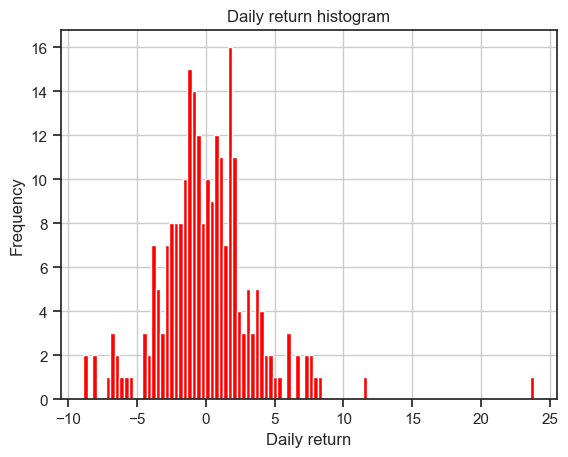

In [10]:
# Calculate daily returns
ada['daily_return'] = ada['Close'].pct_change() * 100

# Plot the histogram
ada['daily_return'].hist(bins=100, color='red')
plt.ylabel('Frequency')
plt.xlabel('Daily return')
plt.title('Daily return histogram')
plt.show()

# Types of Technical Indicators
Trend indicators: measure the direction or strength of a trend. Example: Moving averages (MA), Average Directional Movement Index (ADX)

Momentum indicators: measure the velocity of price movement. Example: Relative Strength Index (RSI)

Volatility indicators: measure the magnitude of price deviations. Example: Bollinger Bands


## Moving Averages

### Simple Moving Average

Daily price data is inherently messy and noisy. You want to analyze the Apple stock daily price data, and plan to add a simple moving average (SMA) indicator to smooth out the data. Specifically, the 50-day SMA.

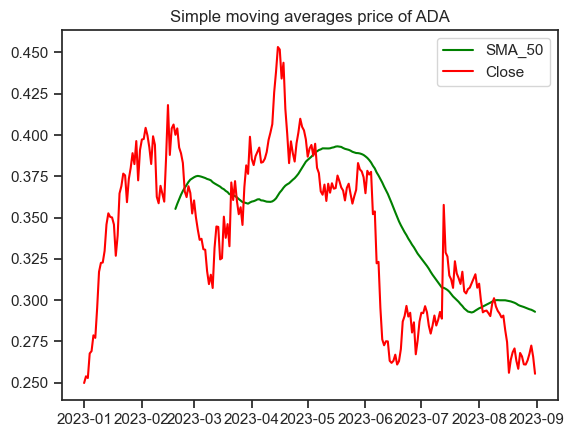

In [11]:
#calculate the rolling price
ada['sma_50'] = ada['Close'].rolling(window=50).mean()

#adjust the figure size


# Plot the SMA
plt.plot(ada['sma_50'], color='green', label='SMA_50')
# Plot the close price
plt.plot(ada['Close'], color='red', label='Close')

# Customize and show the plot
plt.title('Simple moving averages price of ADA')
plt.legend()
plt.show()

### Exponential Moving Average

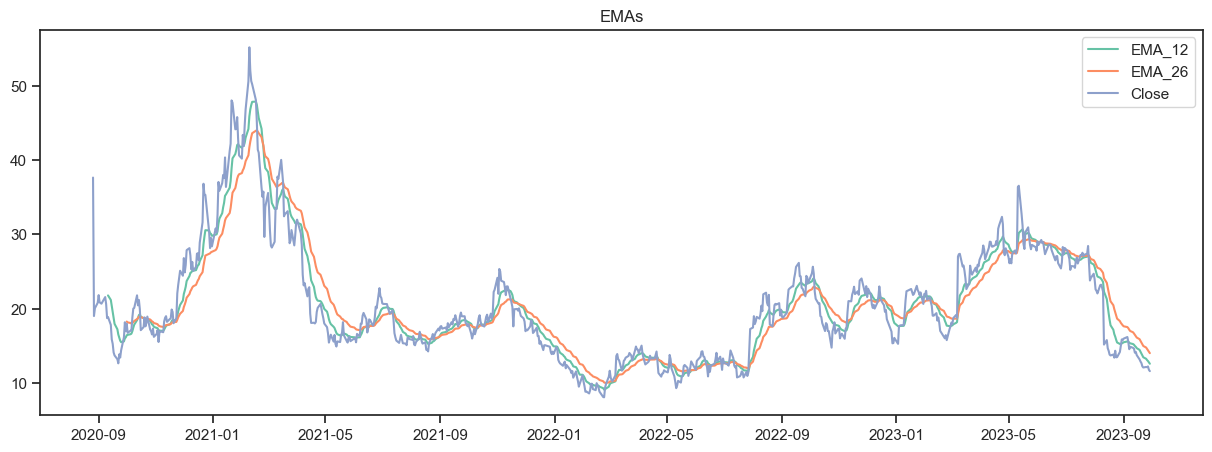

In [12]:
#labeling 'maxn' as stock_data
stock_data = maxn

#change the plot size
plt.figure(figsize=(15,5))

# Calculate 12-day EMA
stock_data['EMA_12'] = talib.EMA(stock_data['Close'], timeperiod=12)
# Calculate 26-day EMA
stock_data['EMA_26'] = talib.EMA(stock_data['Close'], timeperiod=26)

# Plot the EMAs with price
plt.plot(stock_data['EMA_12'], label='EMA_12')
plt.plot(stock_data['EMA_26'], label='EMA_26')
plt.plot(stock_data['Close'], label='Close')

# Customize and show the plot
plt.legend()
plt.title('EMAs')
plt.show()

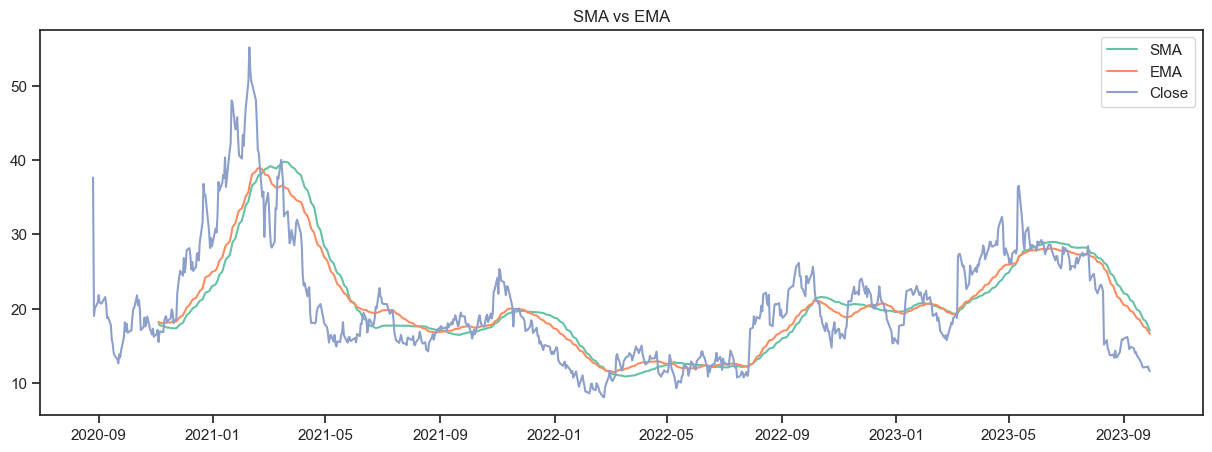

In [13]:
#change the plot size
plt.figure(figsize=(15,5))

# Calculate the 50-day SMA
stock_data['SMA_50'] = talib.SMA(stock_data['Close'], timeperiod=50)
# Calculate the 50-day EMA
stock_data['EMA_50'] = talib.EMA(stock_data['Close'], timeperiod=50)

# Plot the SMA, EMA with price
plt.plot(stock_data['SMA_50'], label='SMA')
plt.plot(stock_data['EMA_50'], label='EMA')
plt.plot(stock_data['Close'], label='Close')

# Customize and show the plot
plt.legend()
plt.title('SMA vs EMA')
plt.show()

## ADX - Average Directional Movement Index

Measures the strength of a trend. <br>
Oscillates between 0 and 100. <br>
ADX <= 25: no trend <br>
ADX > 25: trending market <br>
ADX > 50: strong trending market 


**How is ADX calculated?**

Derived from the smoothed averages of the difference between +DI and -DI <br>
    +DI (Plus Directional Index): quantify the presence of an uptrend <br>
    -DI (Minus Directional Index): quantify the presence of a downtrend <br>


Calculation input: <br>
high, low, and close prices of each period

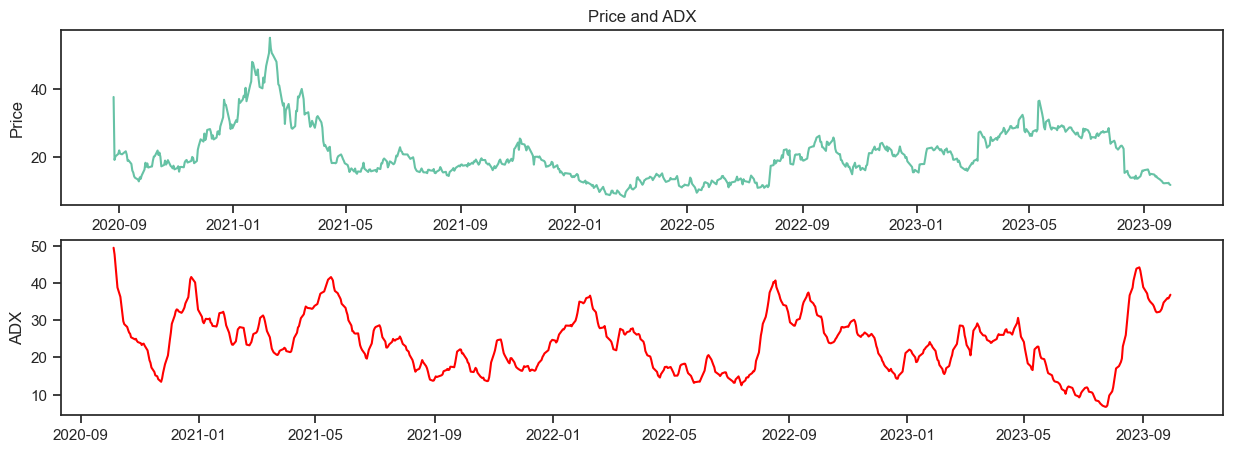

In [14]:
# Calculate ADX
stock_data['ADX'] = talib.ADX(stock_data['High'], stock_data['Low'], stock_data['Close'])

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(15,5))

# Plot ADX with the price
ax1.set_ylabel('Price')
ax1.plot(stock_data['Close'])
ax2.set_ylabel('ADX')
ax2.plot(stock_data['ADX'], color='red')

ax1.set_title('Price and ADX')
plt.show()

## RSI - Relative Strength Index

Measures the momentum of a trend <br>
Oscillates between 0 and 100 <br>
RSI > 70: Overbought <br>
RSI < 30: Oversold


**How is RSI calculated?**

RSI = 100 − 100/(1 + RS)<br>

Where: <br>
RS: relative strength <br>
RS = average of upward price changes / average of downward price changes


In [15]:
# Calculate RSI with the default time period (14-days)
stock_data['RSI_14'] = talib.RSI(stock_data['Close'])

# Calculate RSI with a time period of 21
stock_data['RSI_21'] = talib.RSI(stock_data['Close'], timeperiod=21)

# Print the last five rows
print(stock_data.tail())

             Open    High    Low  Close  Adj Close   Volume     EMA_12  \
Date                                                                     
2023-09-25  11.86  12.220  11.76  12.15      12.15   599800  13.253191   
2023-09-26  11.99  12.500  11.85  12.12      12.12  1289000  13.078854   
2023-09-27  12.25  12.720  12.08  12.22      12.22   950100  12.946722   
2023-09-28  12.12  12.169  11.30  11.77      11.77  2053100  12.765688   
2023-09-29  11.80  12.170  11.45  11.59      11.59  1447900  12.584813   

               EMA_26   SMA_50     EMA_50        ADX     RSI_14     RSI_21  
Date                                                                        
2023-09-25  14.764860  18.2672  17.400998  35.642381  26.671123  29.896157  
2023-09-26  14.568944  17.9654  17.193900  35.950736  26.535185  29.813271  
2023-09-27  14.394949  17.6662  16.998845  35.824164  27.855182  30.487797  
2023-09-28  14.200508  17.3514  16.793792  36.347062  25.623997  29.163507  
2023-09-29  14.0071

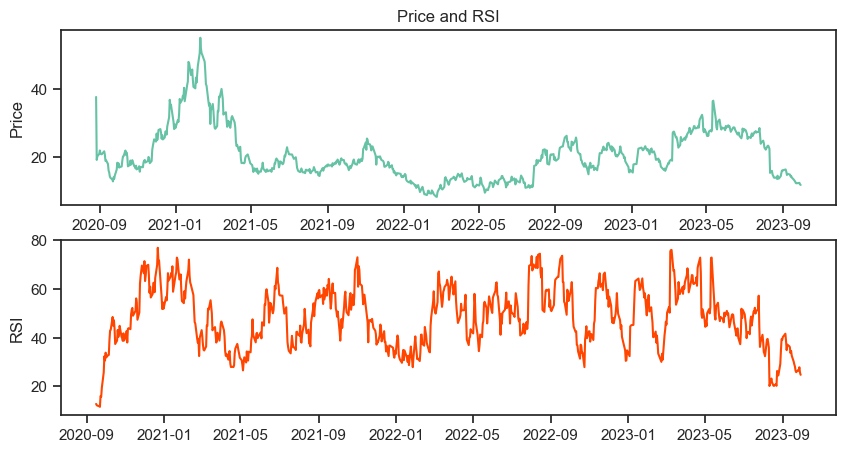

In [16]:
# Calculate RSI
stock_data['RSI'] = talib.RSI(stock_data['Close'])

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,5))
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(stock_data['Close'])
ax2.set_ylabel('RSI')
ax2.plot(stock_data['RSI'], color='orangered')

ax1.set_title('Price and RSI')
plt.show()

## Bollinger bands


Measure price volatility <br>
Composed of three lines: <br>
<blockquote> 
    Middle band: n-period simple moving average <br>
    Upper band: k-standard deviations above the middle band <br>
    Lower band: k-standard deviations below the middle band <br>
</blockquote>

The wider the bands, the more volatile the asset prices.

Measure whether a price is too high or too low on a relative basis: <br>
Relatively high: price close to the upper band <br>
Relatively low: price close to the lower band

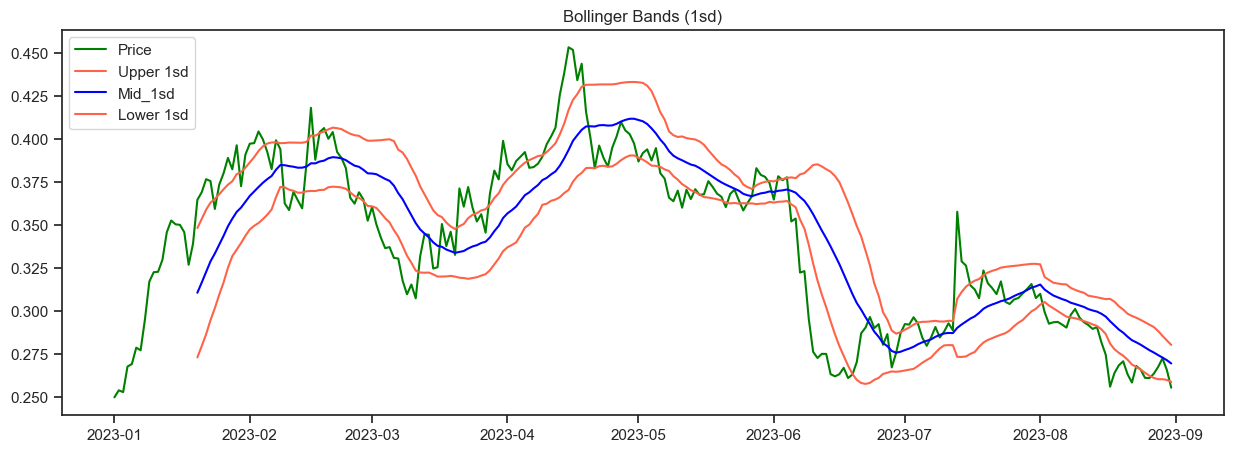

In [17]:
#change the plot size
plt.figure(figsize=(15,5))

# Define the Bollinger Bands with 1-sd (2-sd, 20-days is the default)
upper_1sd, mid_1sd, lower_1sd = talib.BBANDS(ada['Close'], 
                                     nbdevup=1,
                                     nbdevdn=1,
                                     timeperiod=20)

# Plot the upper, middle and lower Bollinger Bands  with the close price
plt.plot(ada['Close'], color='green', label='Price')
plt.plot(upper_1sd, color='tomato', label="Upper 1sd")
plt.plot(mid_1sd, color='blue', label="Mid_1sd")
plt.plot(lower_1sd, color='tomato', label='Lower 1sd')

# Customize and show the plot
plt.legend(loc='upper left')
plt.title('Bollinger Bands (1sd)')
plt.show()

Can be constructed using:
<blockquote>
One technical indicator <br>
Multiple technical indicators <br>
A combination of market data and indicators
</blockquote>

# Backtest

Testing trading strategies on historical performance

**The back testing process**

Step 1: Get the historical price data

Step 2: Define the strategy with the data

Step 3: Backtest the strategy with the data

Step 4: Evaluate the result

In [18]:
# Define the strategy
bt_strategy = bt.Strategy('Trade_Weekly', 
                         [bt.algos.RunWeekly(),
                          bt.algos.SelectAll(),
                          bt.algos.WeighEqually(),
                          bt.algos.Rebalance()])

In [19]:
#bt_data contain

# Create a backtest
bt_test = bt.Backtest(bt_strategy, bt_data)
# Run the backtest
bt_res = bt.run(bt_test)

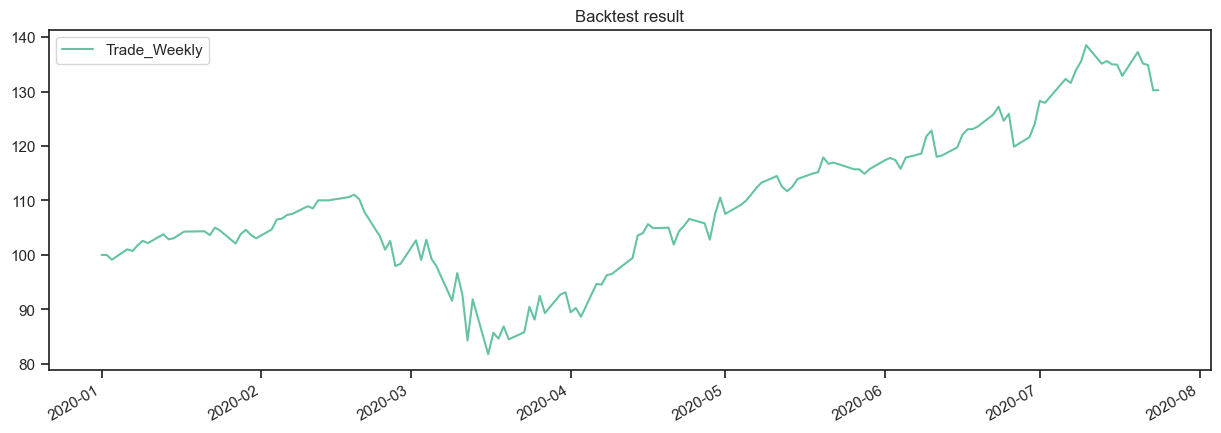

In [20]:
# Plot the test result
bt_res.plot(title="Backtest result")
plt.show()

# Trading Signals

Triggers to long or short financial assets based on predetermined criteria

**Two types of trading strategies covered:** <br>
**Trend-Following:** the price will continue moving in the same direction. Use indicators such as AD and moving Averages <br>
**Mean Reversion:** the price will always revert back to the mean. Use indicator such as RSI and Bollinger Bands 

## Defining a signal-based strategy

We assume:
<blockquote>
    Trade on asset at a time. If trading multiple assets. Must look at the price correlation for proper position sizing and asset allocation <br>
    No slippage or commisionons. Slippage is the difference between the expected price of a trade and the price at which the trade is executed
</blockquote>

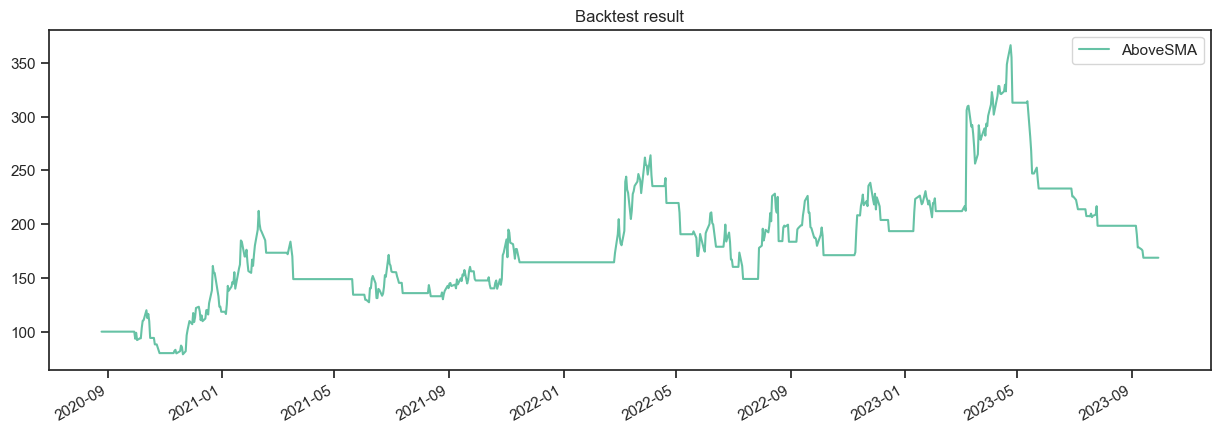

In [21]:
#implementing an SMA-based signal strategy, and then backtesting it with the stock price data.
#change position when the stock is above the simple moving average

#setting price_data to maxn
price_data = maxn

# Calculate the SMA
sma = price_data[['Close']].rolling(20).mean()

# Define the strategy
bt_strategy_1 = bt.Strategy('AboveSMA', 
                          [bt.algos.SelectWhere(price_data[['Close']] > sma),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy_1, price_data)
bt_result = bt.run(bt_backtest)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

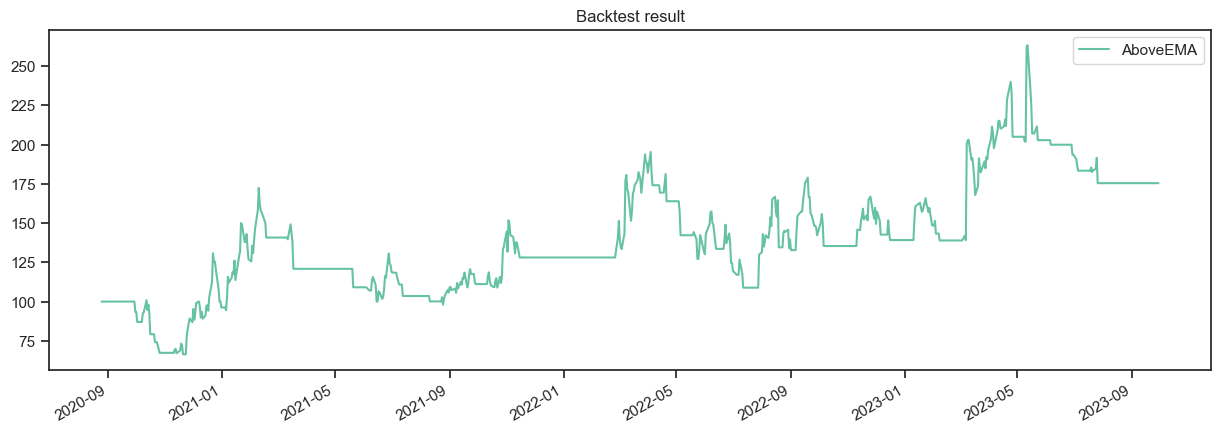

In [22]:
#implementing an EMA-based signal strategy, and then backtesting it with the stock price data.
#change position when the stock is above the simple moving average

#setting price_data to maxn
price_data = maxn[['Close']]

# Calculate the SMA
ema = pd.DataFrame()
ema['Close'] = talib.EMA(price_data['Close'], timeperiod=20)

#align indices if not, it'll throw an error
#price_data, ema = price_data.align(ema, axis=1, copy=False)

# Define the strategy
bt_strategy_2 = bt.Strategy('AboveEMA', 
                          [bt.algos.SelectWhere(price_data > ema),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy_2, price_data)
bt_result = bt.run(bt_backtest)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

## Trend Following Strategies 
<i> The trend is your friend </i> <br>

MA crossover strategy: involves a short moving average and long moving average

Using EMA as an example:<br>
Long signal: the short-term EMA crosses above the long-term EMA<br>
Short signal: the short-term EMA crosses below the long-term EMA<br>

In [23]:
#importing data using the bt package
price_data = bt.get(start='2020-10-02', end='2023-10-02', tickers='MAXN')

#adjusting the column name
price_data.columns = ['Close']

[*********************100%%**********************]  1 of 1 completed


In [24]:
#calculate the indicators
ema_short = talib.EMA(price_data['Close'], timeperiod=10).to_frame()
ema_long = talib.EMA(price_data['Close'], timeperiod=40).to_frame()

In [25]:
#create the signal dataframe
signal = ema_short.copy()
signal[ema_long.isnull()] = 0

#construct the signal
signal[ema_short > ema_long] = 1
signal[ema_short < ema_long] = -1

<Axes: xlabel='Date'>

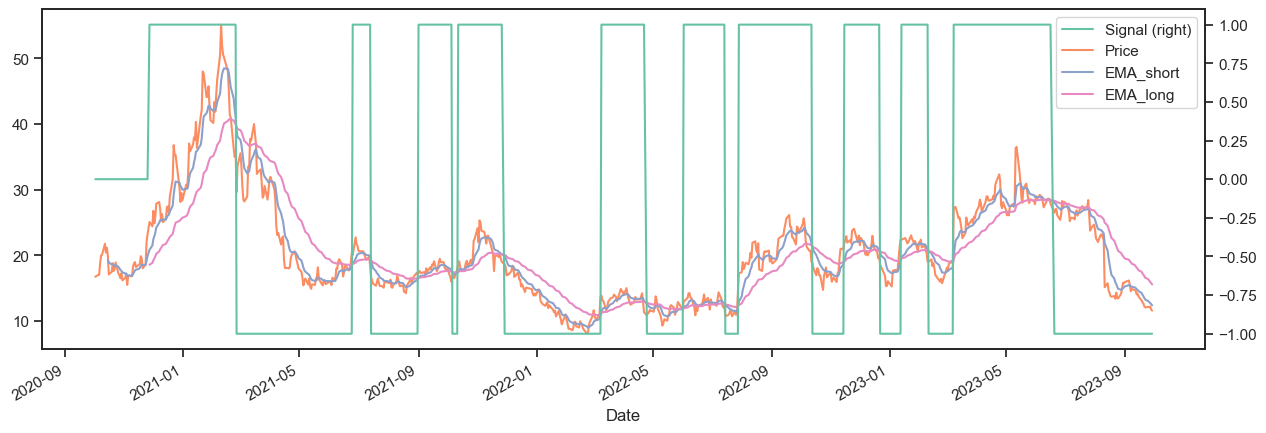

In [26]:
#plot the signal, price and moving averages
signal_df = bt.merge(signal, price_data, ema_short, ema_long)
signal_df.columns = ['Signal', 'Price', 'EMA_short', 'EMA_long']
signal_df.plot(secondary_y=['Signal'], figsize=(15,5))

In [27]:
#define the strategy using the signal as the weights
bt_strategy2 = bt.Strategy('EMA_crossover', 
                           [bt.algos.WeighTarget(signal),
                            bt.algos.Rebalance()])

In [28]:
#the signal and price data column label need to match otherwise an error is thrown
signal.columns = ['Close']

In [29]:
#run the backtest strategy
bt_backtest2 = bt.Backtest(bt_strategy2, price_data)
bt_result2 = bt.run(bt_backtest2)

<Axes: title={'center': 'Backtest result'}>

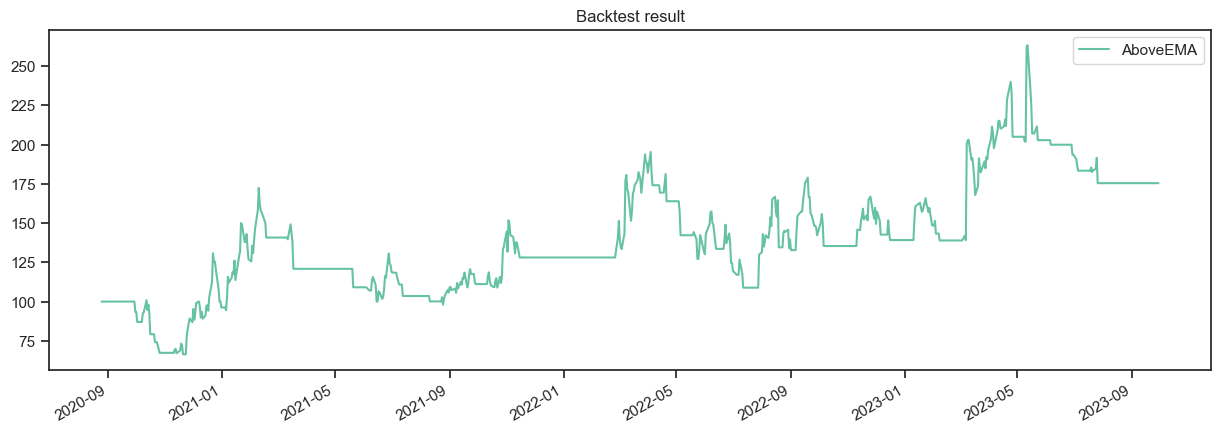

In [30]:
#plot the back test result
bt_result.plot(title='Backtest result')

## Mean Reversion Strategy

<i>Buy the dip and sell the peak</i>

RSI-based mean reversion strategy: <br>
Short signal - the asset is likely overbought and the price may soon reverse: RSI > 70 <br>
Long signal - the asset is likely oversold and the price may soon rally: RSI < 30 <br>

In [31]:
# Calculate the RSI
stock_rsi = talib.RSI(price_data['Close']).to_frame()

In [32]:
#create the same DataFrame structure as RSI
signal_1 = stock_rsi.copy()
signal_1[stock_rsi.isnull()] = 0

#Construct the signal
signal_1[stock_rsi < 30] = 1
signal_1[stock_rsi > 70] = -1
signal_1[(stock_rsi >= 30) & (stock_rsi <= 70)] = 0

In [33]:
#the signal and price data column label need to match otherwise an error is thrown
signal_1.columns = ['Close']

<Axes: xlabel='Date'>

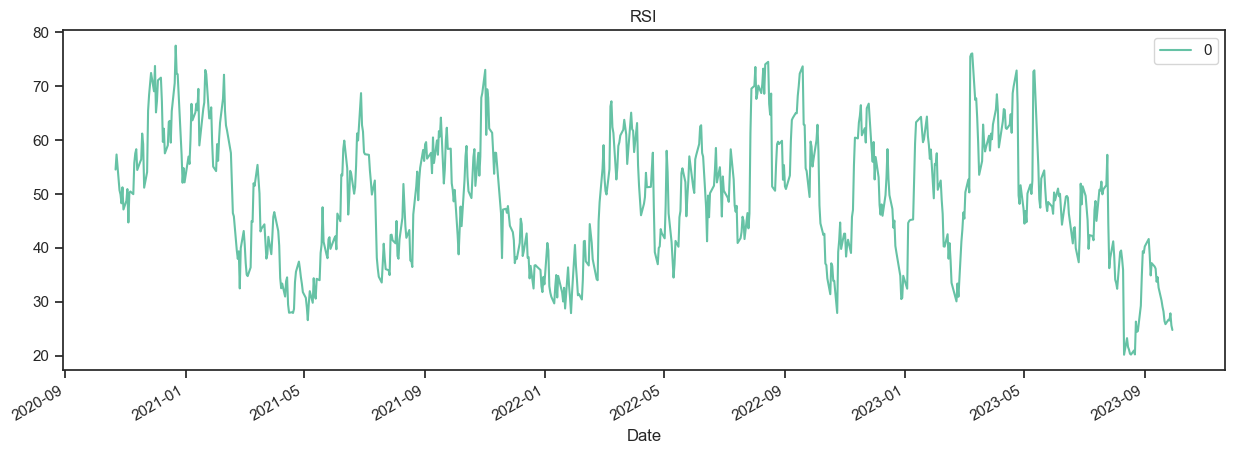

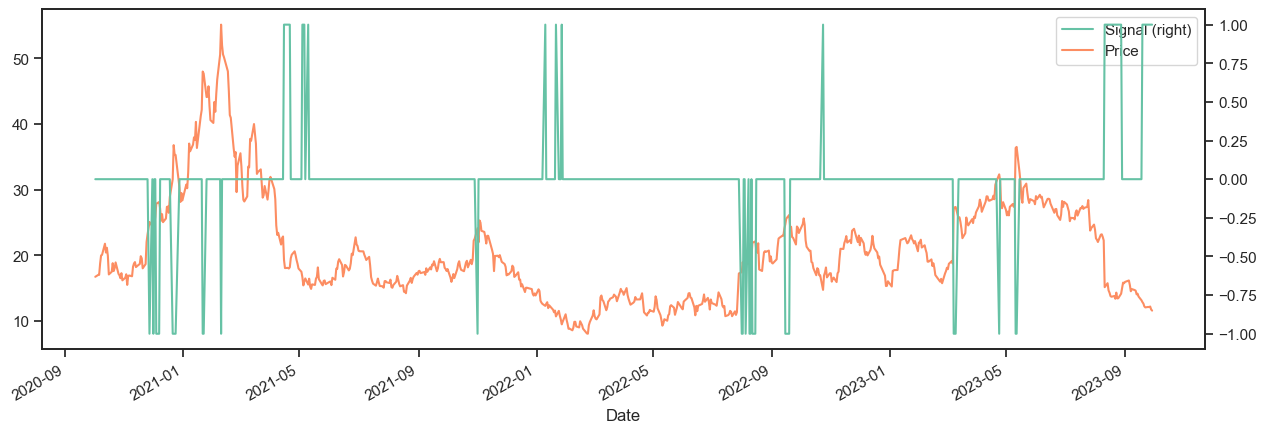

In [34]:
#plot the RSI
stock_rsi.plot(figsize=(15,5))
plt.title('RSI')


#Merge data into one DataFrame
comb_df = bt.merge(signal_1, price_data)
comb_df.columns = ['Signal', 'Price']
comb_df.plot(secondary_y = ['Signal'], figsize=(15,5))

In [35]:
#Define the strategy
bt_strategy3 = bt.Strategy('RSI_MeanReversion',
                          [bt.algos.WeighTarget(signal_1),
                           bt.algos.Rebalance()])

In [36]:
# Create the backtest and run it
bt_backtest3 = bt.Backtest(bt_strategy3, price_data)
bt_result3 = bt.run(bt_backtest3)

<Axes: title={'center': 'Backtest result'}>

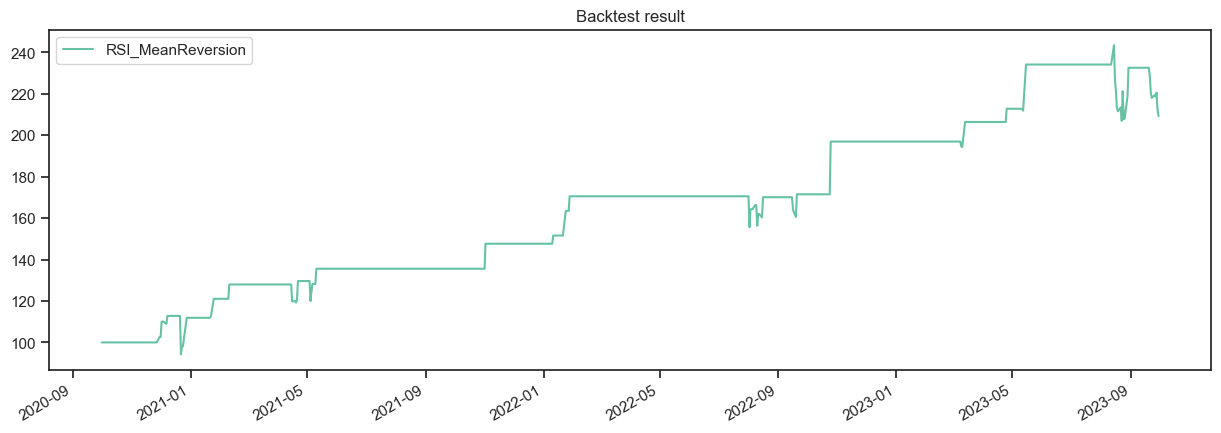

In [37]:
bt_result3.plot(title='Backtest result')

## Strategy Optimization

Try a range of input parameter values in backresting and compare the results

In [39]:
#This is function will most likely only work for moving averages. 
#Signal based strategies need a new function. Ensure that the signal column label and the price_data column labels are matching 

def signal_strategy(ticker, period, name, start='2018-4-1', end='2020-11-1'):
    # Get the data and calculate SMA
    price_data = bt.get(ticker, start=start, end=end)
    sma = price_data.rolling(period).mean()
    # Define the signal-based strategy
    bt_strategy = bt.Strategy(name, [bt.algos.SelectWhere(price_data>sma),
                                    bt.algos.WeighEqually(),
                                    bt.algos.Rebalance()])
    # Return the backtest
    return bt.Backtest(bt_strategy, price_data)

[*********************100%%**********************]  1 of 1 completed


<Axes: title={'center': 'Strategy optimization'}>

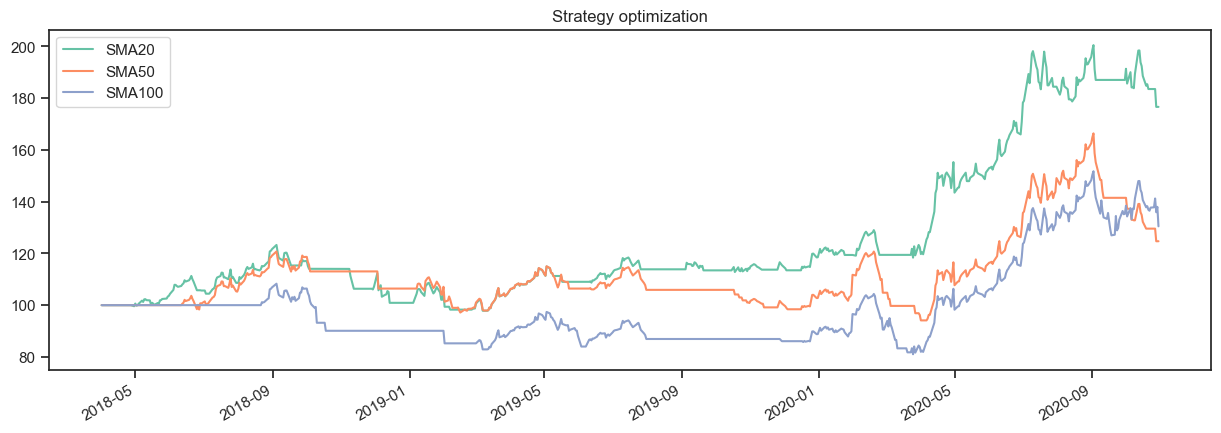

In [40]:
#creating several moving average signals
ticker = 'amzn'
sma20 = signal_strategy(ticker, period=20, name='SMA20')
sma50 = signal_strategy(ticker, period=50, name='SMA50')
sma100 = signal_strategy(ticker, period=100, name='SMA100')

# Run backtests and compare results
bt_results4 = bt.run(sma20, sma50, sma100)
bt_results4.plot(title='Strategy optimization')

## Benchmarking

A standard/point of reference use to compare a strategy

In [41]:
def buy_and_hold(ticker, name, start_date='2018-11-1', end_date='2020-12-1'):
    # Get the data
    price_data = bt.get(ticker, start=start_date, end=end_date)
    # Define the benchmark strategy
    bt_strategy = bt.Strategy(name, [bt.algos.RunOnce(),
                                     bt.algos.SelectAll(),
                                     bt.algos.WeighEqually(),
                                     bt.algos.Rebalance()])
    # Return the backtest
    return bt.Backtest(bt_strategy, price_data)

[*********************100%%**********************]  1 of 1 completed


<Axes: title={'center': 'Strategy benchmarking'}>

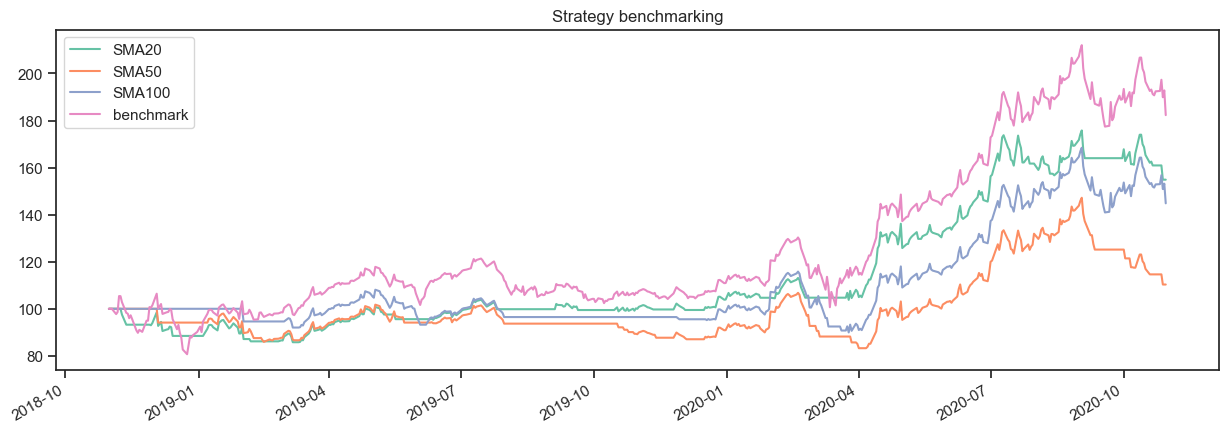

In [42]:
#creating the benchmark
benchmark = buy_and_hold(ticker, name='benchmark')
# Run all backtests and plot the resutls
bt_results5 = bt.run(sma20, sma50, sma100, benchmark)
bt_results5.plot(title='Strategy benchmarking')

# Performance Evaluation

## Return Analysis

In [43]:
#Obtain all backtest stats
resInfo = bt_result3.stats
print(resInfo.index)

Index(['start', 'end', 'rf', 'total_return', 'cagr', 'max_drawdown', 'calmar',
       'mtd', 'three_month', 'six_month', 'ytd', 'one_year', 'three_year',
       'five_year', 'ten_year', 'incep', 'daily_sharpe', 'daily_sortino',
       'daily_mean', 'daily_vol', 'daily_skew', 'daily_kurt', 'best_day',
       'worst_day', 'monthly_sharpe', 'monthly_sortino', 'monthly_mean',
       'monthly_vol', 'monthly_skew', 'monthly_kurt', 'best_month',
       'worst_month', 'yearly_sharpe', 'yearly_sortino', 'yearly_mean',
       'yearly_vol', 'yearly_skew', 'yearly_kurt', 'best_year', 'worst_year',
       'avg_drawdown', 'avg_drawdown_days', 'avg_up_month', 'avg_down_month',
       'win_year_perc', 'twelve_month_win_perc'],
      dtype='object')


In [44]:
# Get daily, monthly and yearly returns
print('Daily return: %.4f'% resInfo.loc['daily_mean'].item())
print('Monthly return: %.4f'% resInfo.loc['monthly_mean'].item())
print('Yearly return: %.4f'% resInfo.loc['yearly_mean'].item())

Daily return: 0.2791
Monthly return: 0.2690
Yearly return: 0.2386


In [45]:
# Get the compound annual growth rate
print('Compound annual growth rate: %.4f'% resInfo.loc['cagr'].item())

Compound annual growth rate: 0.2798


Text(0.5, 0.98, 'weekly Return Histogram Matrix')

<Figure size 640x480 with 0 Axes>

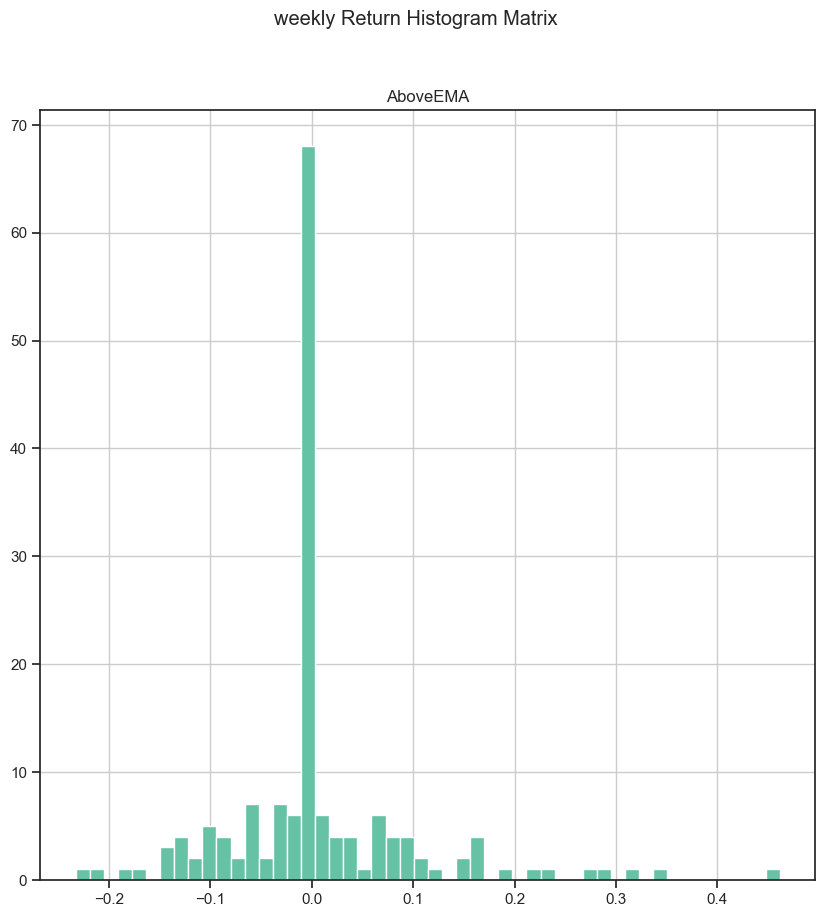

In [46]:
# Plot the weekly return histogram
bt_result.plot_histograms(bins=50, freq = 'w')

In [47]:
# Get the lookback returns
lookback_returns = bt_results5.display_lookback_returns()
print(lookback_returns)

        SMA20    SMA50  SMA100 benchmark
mtd    -5.57%  -11.86%  -3.58%    -3.58%
3m     -4.23%  -13.27%  -0.52%    -0.52%
6m     13.75%    6.98%  22.72%    22.72%
ytd    49.03%   21.33%  46.88%    64.31%
1y     54.59%   23.44%  50.09%    70.57%
3y     24.46%    5.03%  20.35%    35.04%
5y       nan%     nan%    nan%      nan%
10y      nan%     nan%    nan%      nan%
incep  24.46%    5.03%  20.35%    35.04%


### Drawdown

The difference bettween the peak and trough for a trading account during a specific period

In [48]:
# Get the max drawdown
max_drawdown = resInfo.loc['max_drawdown'].item()
print('Maximum drawdown: %.2f'% max_drawdown)
# Get the average drawdown
avg_drawdown = resInfo.loc['avg_drawdown'].item()
print('Average drawdown: %.2f'% avg_drawdown)
# Get the average drawdown days
avg_drawdown_days = resInfo.loc['avg_drawdown_days'].item()
print('Average drawdown days: %.0f'% avg_drawdown_days)

Maximum drawdown: -0.16
Average drawdown: -0.07
Average drawdown days: 18


### The Calmer ratio

CALMER: California Managed Accounts Report <br>
Calmer = CAGR / MAX Drawdown

The higher the Calmar ratio, the better a strategy performed on a risk-adjusted basis. <br>
Typically a Camlar ratio larger than 3 is considered excellent.

In [49]:
# Get the Calmar ratio
calmar = resInfo.loc['calmar'].item()
print('Calmar Ratio: %.2f'% calmar)

Calmar Ratio: 1.70


### Sharpe Ratio

designed to measure the expected return per unit of risk for a zero investment strategy

(Return of a strategy - Risk-free rate)/standard deviation of the excess return <br>
The bigger the Sharpe ratio, the more attractive the return <br>

**Limitations** <br>
Penalize both the "good" and "bad" volatility <br>
Upside volatility can skew the ratio downward <br>

In [50]:
# Get Sharpe ratios from the backtest stats
print('Sharpe ratio daily: %.2f'% resInfo.loc['daily_sharpe'].item())
print('Sharpe ratio monthly %.2f'% resInfo.loc['monthly_sharpe'].item())
print('Sharpe ratio annually %.2f'% resInfo.loc['yearly_sharpe'].item())

Sharpe ratio daily: 1.10
Sharpe ratio monthly 1.59
Sharpe ratio annually 1.56


### Sortino Ratio

a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns.

(Return of a strategy - Risk-free rate)/**Downside deviation** of the excess return

In [51]:
# Get Sortino ratio from backtest stats
print('Sortino ratio daily: %.2f'% resInfo.loc['daily_sortino'].item())
print('Sortino ratio monthly %.2f'% resInfo.loc['monthly_sortino'].item())
print('Sortino ratio annually %.2f'% resInfo.loc['yearly_sortino'].item())

Sortino ratio daily: 1.91
Sortino ratio monthly 4.57
Sortino ratio annually inf
